**Import Packages**

In [36]:
import numpy as np
import cv2
import glob  # used to read multiple images in a folder
from matplotlib import pyplot as plt
%matplotlib inline

**Read Database**

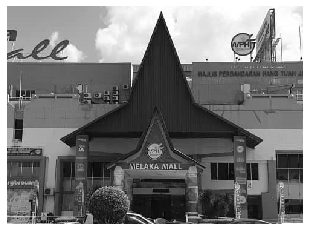

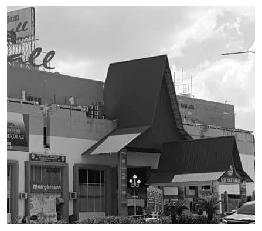

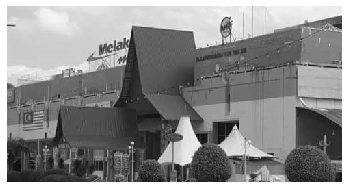

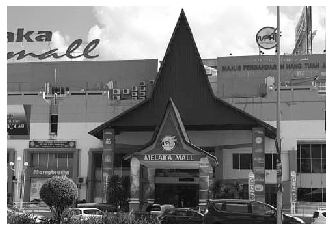

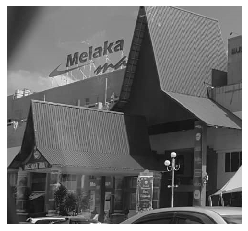

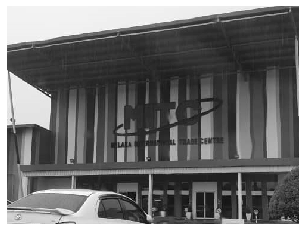

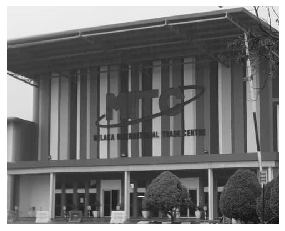

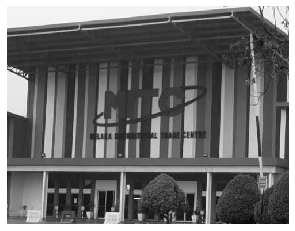

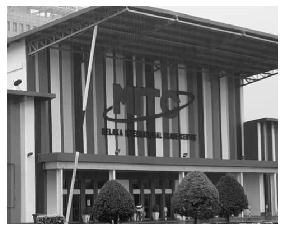

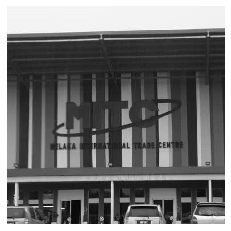

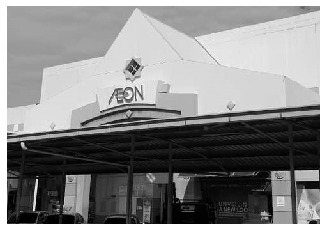

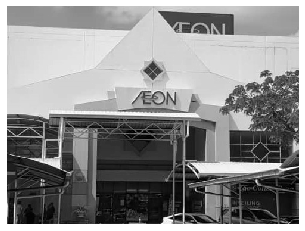

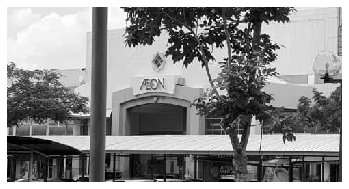

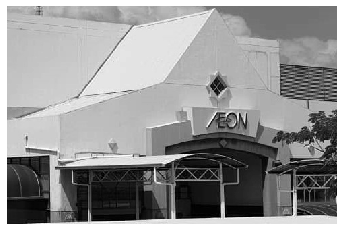

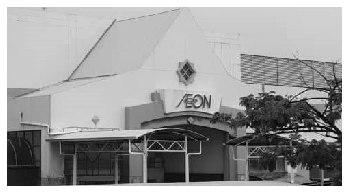

['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']


In [37]:
path="C:/Users/Sim Jia Yao/Desktop/CV 3rd sem/pr/"
dirs=glob.glob(path+"*.jpeg")
images=[]
for img in dirs:
    images.append(cv2.imread(img,0))


**Set the name of each database images**

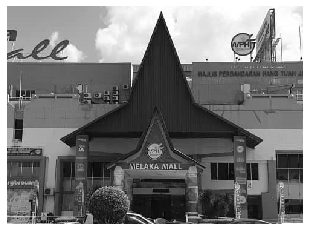

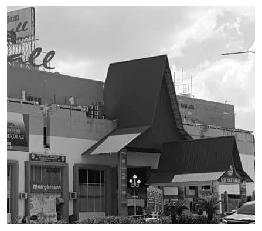

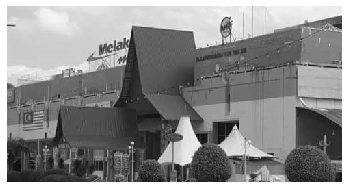

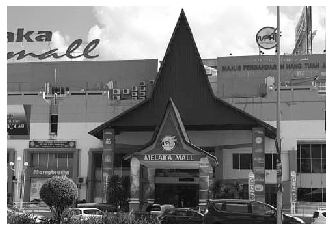

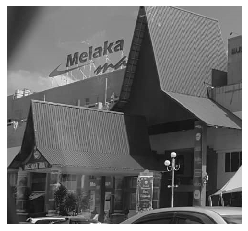

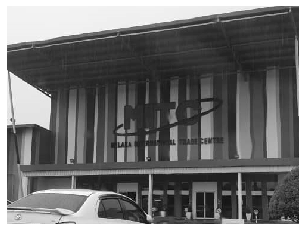

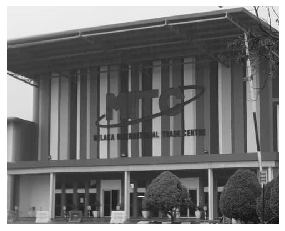

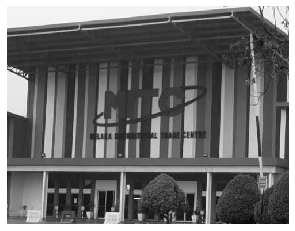

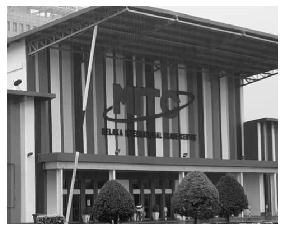

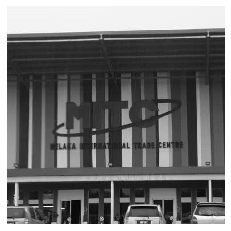

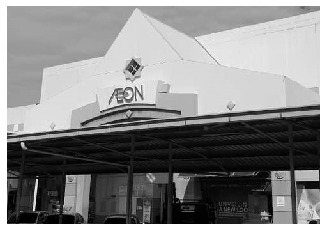

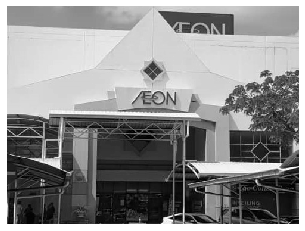

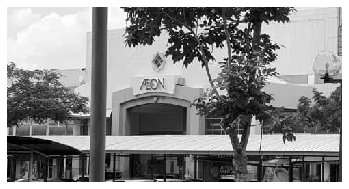

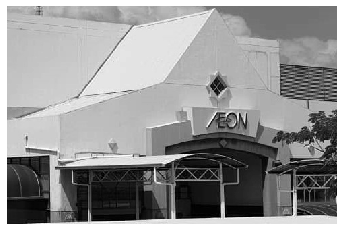

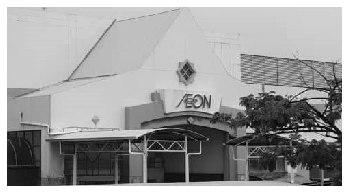

['Melaka Mall', 'Melaka Mall', 'Melaka Mall', 'Melaka Mall', 'Melaka Mall', 'MITC', 'MITC', 'MITC', 'MITC', 'MITC', 'AEON', 'AEON', 'AEON', 'AEON', 'AEON']


In [49]:
mall_name=[]
for img_db in images:
    mall_name.append("X")
    plt.imshow(img_db,cmap='gray'),plt.axis('off')
    plt.show()

mall_name[0]="Melaka Mall"
mall_name[1]="Melaka Mall"
mall_name[2]="Melaka Mall"
mall_name[3]="Melaka Mall"
mall_name[4]="Melaka Mall"
mall_name[5]="MITC"
mall_name[6]="MITC"
mall_name[7]="MITC"
mall_name[8]="MITC"
mall_name[9]="MITC"
mall_name[10]="AEON"
mall_name[11]="AEON"
mall_name[12]="AEON"
mall_name[13]="AEON"
mall_name[14]="AEON"

print(mall_name)

**SET the first Query Image and Apply AKAZE**

The query images is:  Melaka Mall
[5, 1, 4, 8, 1, 1, 2, 0, 0, 2, 2, 1, 4, 3, 3]
3


(<matplotlib.image.AxesImage at 0x24533eb4f88>,
 (-0.5, 979.5, 489.5, -0.5),
 Text(0.5, 1.0, 'AKAZE images'))

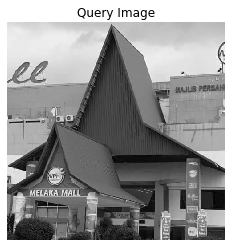

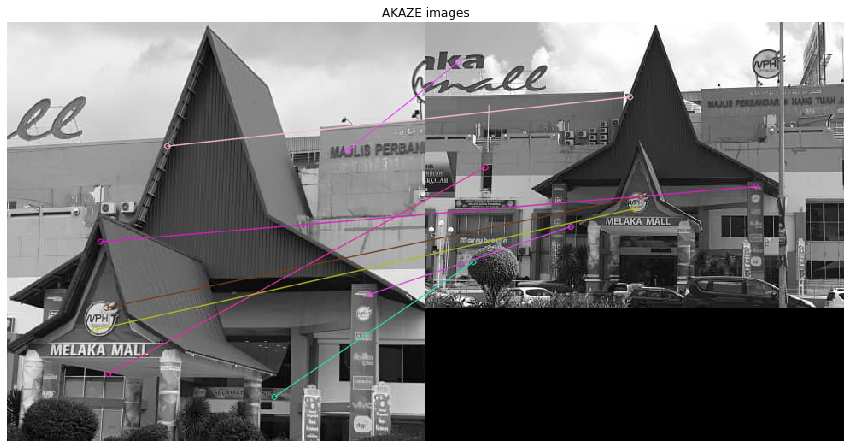

In [105]:
img_query1 = cv2.imread('C:/Users/Sim Jia Yao/Desktop/CV 3rd sem/Test images/test image1.jpeg') # queryImage
img_query1 = cv2.cvtColor(img_query1,cv2.COLOR_BGR2GRAY) # convert color from BGR to gray
plt.imshow(img_query1, cmap='gray'), plt.axis('off'),plt.title("Query Image")

good_list=[]
good_store=[]
good_temp=0
highest_matches=0
kp1=[]
kp2=[]
des1=[]
des2=[]
for index, img_db in enumerate(images):
   # Initiate AKAZE detector
    akaze = cv2.AKAZE_create()
    kp1.append(index)
    kp2.append(index)
    des1.append(index)
    des2.append(index)
    (kp1[index], des1[index]) = akaze.detectAndCompute(img_query1, None)
    (kp2[index], des2[index]) = akaze.detectAndCompute(images[index], None)

    # BFMatcher with default params
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1[index],des2[index], k=2)

    # Apply ratio test and get a list of good matches
    good = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])
    
    good_total = len(good)
    good_list.append(good_total)
    if good_total>good_temp:
        good_store=good
        good_temp=good_total
    #When run out the database images, choose the highest matches
    if(index ==14):
        highest_matches=np.argmax(good_list)
        
print("The query images is: ",mall_name[highest_matches])
print(good_list)
print(highest_matches)

# cv2.drawMatchesKnn gives a list of lists as matches
img_akaze = cv2.drawMatchesKnn(img_query1,kp1[highest_matches],images[highest_matches],kp2[highest_matches],good_store, None, flags=2)
fig = plt.figure(figsize = (15,15)) 
ax = fig.add_subplot(111)
ax.imshow(img_akaze), plt.axis('off'),plt.title("AKAZE images")

**Set the other two Query Images**

The query images is:  MITC
[1, 1, 2, 1, 1, 10, 20, 15, 86, 9, 2, 4, 4, 2, 2]
8


(<matplotlib.image.AxesImage at 0x245340d1088>,
 (-0.5, 1239.5, 388.5, -0.5),
 Text(0.5, 1.0, 'AKAZE images'))

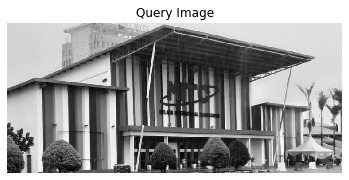

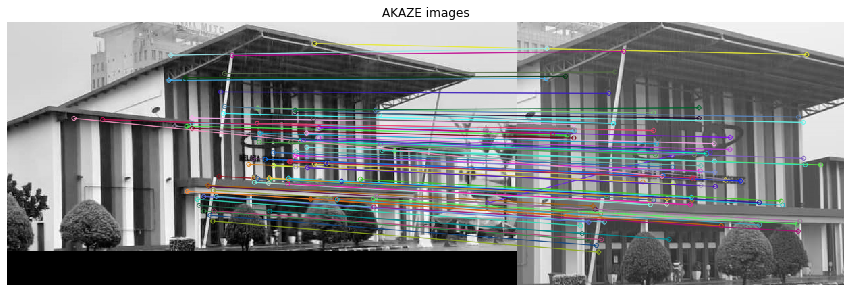

In [106]:
img_query2 = cv2.imread('C:/Users/Sim Jia Yao/Desktop/CV 3rd sem/Test images/test image5.jpeg') # queryImage
img_query2 = cv2.cvtColor(img_query2,cv2.COLOR_BGR2GRAY) # convert color from BGR to gray
plt.imshow(img_query2, cmap='gray'), plt.axis('off'),plt.title("Query Image")

good_list=[]
good_store=[]
good_temp=0
highest_matches=0
kp1=[]
kp2=[]
des1=[]
des2=[]
for index, img_db in enumerate(images):
   # Initiate AKAZE detector
    akaze = cv2.AKAZE_create()
    kp1.append(index)
    kp2.append(index)
    des1.append(index)
    des2.append(index)
    (kp1[index], des1[index]) = akaze.detectAndCompute(img_query2, None)
    (kp2[index], des2[index]) = akaze.detectAndCompute(images[index], None)

    # BFMatcher with default params
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1[index],des2[index], k=2)

    # Apply ratio test and get a list of good matches
    good = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])
    
    good_total = len(good)
    good_list.append(good_total)
    if good_total>good_temp:
        good_store=good
        good_temp=good_total
    #When run out the database images, choose the highest matches
    if(index ==14):
        highest_matches=np.argmax(good_list)
        
print("The query images is: ",mall_name[highest_matches])
print(good_list)
print(highest_matches)

# cv2.drawMatchesKnn gives a list of lists as matches
img_akaze = cv2.drawMatchesKnn(img_query2,kp1[highest_matches],images[highest_matches],kp2[highest_matches],good_store, None, flags=2)
fig = plt.figure(figsize = (15,15)) 
ax = fig.add_subplot(111)
ax.imshow(img_akaze), plt.axis('off'),plt.title("AKAZE images")

The query images is:  AEON
[1, 5, 6, 3, 5, 3, 6, 3, 0, 4, 5, 3, 3, 7, 22]
14


(<matplotlib.image.AxesImage at 0x245383126c8>,
 (-0.5, 1245.5, 604.5, -0.5),
 Text(0.5, 1.0, 'AKAZE images'))

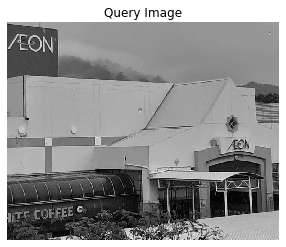

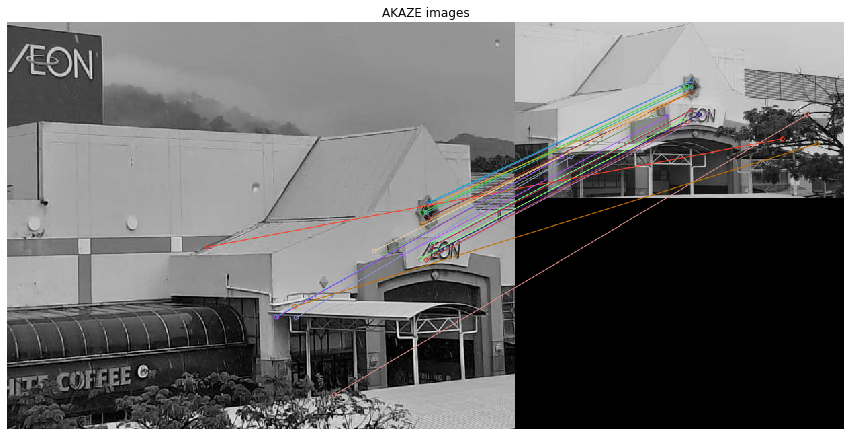

In [111]:
img_query3 = cv2.imread('C:/Users/Sim Jia Yao/Desktop/CV 3rd sem/Test images/test image4.jpeg') # queryImage
img_query3 = cv2.cvtColor(img_query3,cv2.COLOR_BGR2GRAY) # convert color from BGR to gray
plt.imshow(img_query3, cmap='gray'), plt.axis('off'),plt.title("Query Image")

good_list=[]
good_store=[]
good_temp=0
highest_matches=0
kp1=[]
kp2=[]
des1=[]
des2=[]

for index, img_db in enumerate(images):
   # Initiate AKAZE detector
    akaze = cv2.AKAZE_create()
    kp1.append(index)
    kp2.append(index)
    des1.append(index)
    des2.append(index)
    (kp1[index], des1[index]) = akaze.detectAndCompute(img_query3, None)
    (kp2[index], des2[index]) = akaze.detectAndCompute(images[index], None)

    # BFMatcher with default params
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1[index],des2[index], k=2)

    # Apply ratio test and get a list of good matches
    good = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])
    
    good_total = len(good)
    good_list.append(good_total)
    if good_total>good_temp:
        good_store=good
        good_temp=good_total
    #When run out the database images, choose the highest matches
    if(index ==14):
        highest_matches=np.argmax(good_list)
        
print("The query images is: ",mall_name[highest_matches])
print(good_list)
print(highest_matches)

# cv2.drawMatchesKnn gives a list of lists as matches
img_akaze = cv2.drawMatchesKnn(img_query3,kp1[highest_matches],images[highest_matches],kp2[highest_matches],good_store, None, flags=2)
fig = plt.figure(figsize = (15,15)) 
ax = fig.add_subplot(111)
ax.imshow(img_akaze), plt.axis('off'),plt.title("AKAZE images")